<a href="https://colab.research.google.com/github/playitsaiff/natural-language-processing/blob/master/newsentimnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [74]:
import nltk
nltk.download('punkt')
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
from google.colab import files
uploaded = files.upload()

Saving Sampled.csv to Sampled (4).csv


In [0]:
df = pd.read_csv("Sampled.csv")

In [34]:
import nltk
nltk.download ("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#(len(df)-df.count())/len(df)

no data place with nan value

In [0]:
df=df.drop(columns={"Unnamed: 0","Unnamed: 0.1"})

In [0]:
#df.airline_name.value_counts()


In [0]:
X=df.select_dtypes(include=["float", 'int'])

In [0]:
X=X.join(pd.get_dummies(df["cabin_flown"]))



In [0]:
X=X.join(pd.get_dummies(df["airline_name"]))

In [0]:
X=X.join(pd.get_dummies(df["author_country"]))

In [0]:
#df.describe()

In [0]:
df['period'] = df["Month"].map(str)+"-"+df["Year"].map(str)


In [0]:
df["Date"]=pd.to_datetime(df["period"],format="%m-%Y")
df=df.drop(["period","Month","Year"],axis=1)
df.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=False)
df = df.sort_index()

In [0]:
#df.cabin_flown.value_counts()

In [0]:
#df.author_country.value_counts()

In [0]:
#df.shape


In [0]:
economy=df[df.cabin_flown=="Economy"]
business=df[df.cabin_flown=="Business Class"]
peconomy=df[df.cabin_flown=="Premium Economy"]
first=df[df.cabin_flown=="First Class"]

In [0]:
#peconomy.shape


In [0]:
#peconomy.head()

In [48]:
print(len(df.author_country.unique()))
print(len(df.author.unique()))
print(len(df.airline_name.unique()))
print(len(df))

85
1885
186
2000


In [0]:
df=df.drop_duplicates({"author","author_country","content"},keep="first")

In [50]:
len(df)

2000

In [0]:
Mood_count=df["recommended"].value_counts()

Text(0.5, 1.0, 'count of Moods')

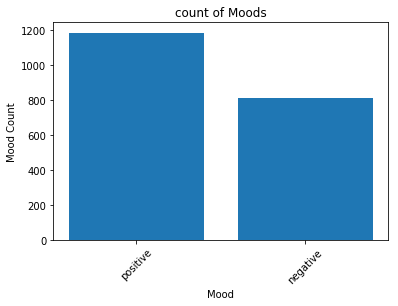

In [52]:
Index=[0,1]
plt.bar(Index,Mood_count)
plt.xticks(Index,["positive","negative"],rotation=45)
plt.xlabel('Mood')
plt.ylabel("Mood Count")
plt.title("count of Moods")

In [53]:

df.corr()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
overall_rating,1.000000,0.726990,0.772878,0.643766,0.411477,0.823172,0.867648
seat_comfort_rating,0.726990,1.000000,0.602851,0.557131,0.408442,0.706733,0.649986
cabin_staff_rating,0.772878,0.602851,1.000000,0.650660,0.374240,0.706100,0.694294
food_beverages_rating,0.643766,0.557131,0.650660,1.000000,0.497740,0.609965,0.574535
inflight_entertainment_rating,0.411477,0.408442,0.374240,0.497740,1.000000,0.405268,0.358090
value_money_rating,0.823172,0.706733,0.706100,0.609965,0.405268,1.000000,0.755641
recommended,0.867648,0.649986,0.694294,0.574535,0.358090,0.755641,1.000000


In [0]:
y_rating=X["recommended"]
y_rating_train=y_rating[:1500][:]
y_rating_test=y_rating[1500:][:]
x_rating=X.drop(columns="recommended")
x_rating_train=x_rating[:1500][:]
x_rating_test=x_rating[1500:][:]


In [0]:
Classifiers = [
    LogisticRegression(C=0.000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [65]:

Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(x_rating_train,y_rating_train)
    pred = fit.predict(x_rating_test)
    accuracy = accuracy_score(pred,y_rating_test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))  

Accuracy of LogisticRegressionis 0.616
Accuracy of KNeighborsClassifieris 0.924


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.926
Accuracy of DecisionTreeClassifieris 0.926
Accuracy of RandomForestClassifieris 0.94
Accuracy of AdaBoostClassifieris 0.93
Accuracy of GaussianNBis 0.47


Text(0.5, 1.0, 'Accuracies of Models')

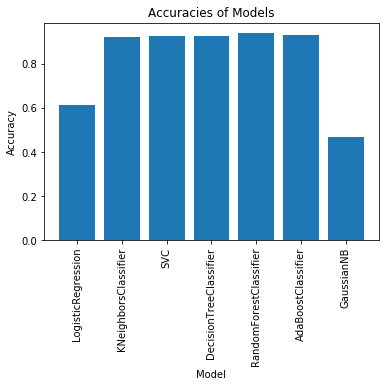

In [66]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [0]:
x_review["text"]=df["content"]

In [0]:
import re,nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
wordnet_lemmatizer=WordNetLemmatizer()


In [0]:
def normalizer(review):
    only_letters = re.sub("[^a-zA-Z]", " ",review) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

In [83]:
pd.set_option('display.max_colwidth', -1)
x_review['normalized'] = x_review.apply(normalizer)

TypeError: ignored

In [0]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
x_review['grams'] = tweets.normalized_tweet.apply(ngrams)
tweets[['grams']].head()

In [86]:
x_review.columns



AttributeError: ignored